In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
input_path = "./Exercise 5.1/"
output_path = "./"

# 1. Histogram Thresholding

#### 1.1. Given the image in Fig. 1, calculate its histogram from scratch and make its plot with the pyplot package.

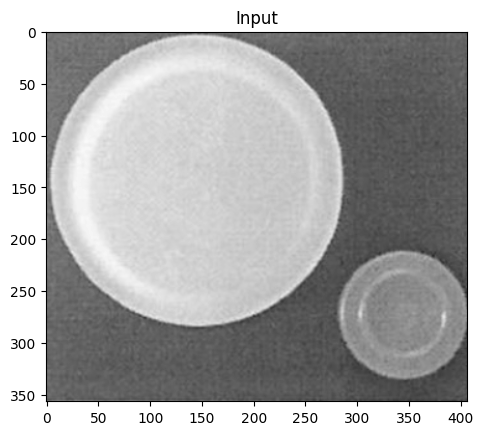

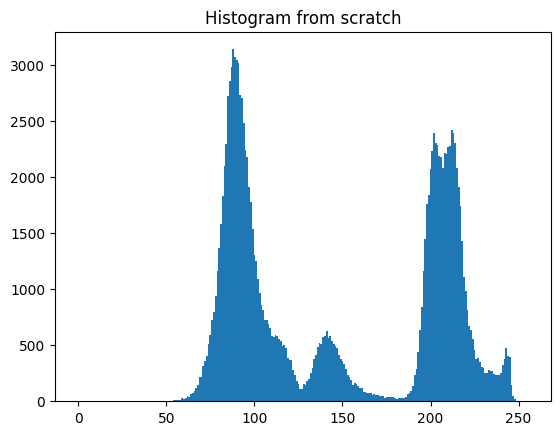

In [3]:
def histogram(img):
    return [np.sum(img == i) for i in range(256)]

# Calculate the histogram
img = cv2.imread(input_path + 'dosPlatos.png', cv2.IMREAD_GRAYSCALE)
hist = histogram(img)

# Plot it with pyplot
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Input")
plt.show()

plt.bar(np.arange(0, 256), hist, width=1) # plot histogram bars instead of a curve
plt.title("Histogram from scratch")
plt.show()

#### 1.2. Do the same as i) by using the “seaborn” package for all.

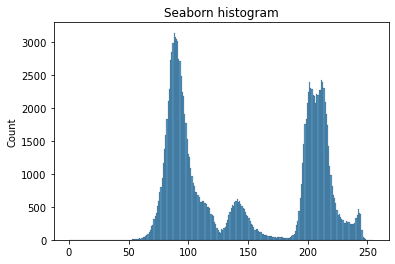

In [4]:
sns.histplot(img.ravel(), binrange=(0, 255), bins=256)
plt.title("Seaborn histogram")
plt.show()

#### 1.3. Obtain a smoothed version of this histogram by using KDE from the "seaborn" package.

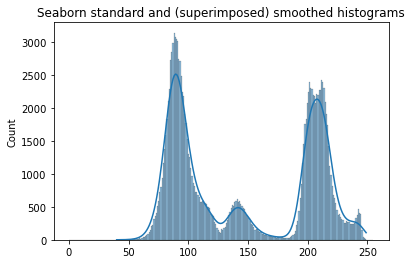

In [5]:
sns.histplot(img.ravel(), kde=True, binrange=(0, 255), bins=256)
plt.title("Seaborn standard and (superimposed) smoothed histograms")
plt.show()

#### 2. Given the image in Fig. 1, implement a multilevel threshold algorithm for N different levels separated in the output image a distance inc.

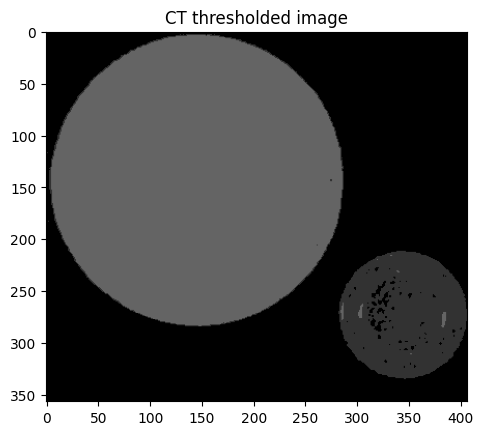

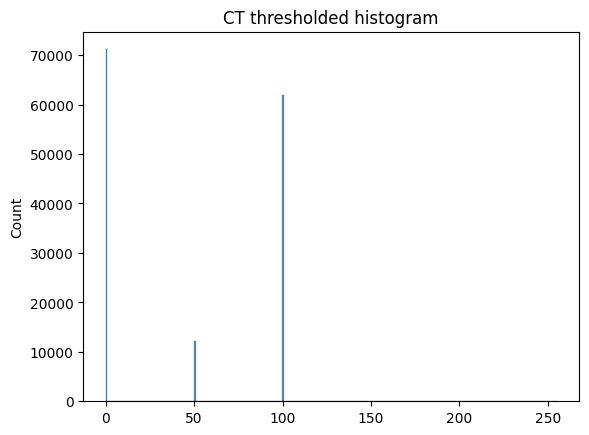

In [4]:
def multilevel_threshold(img, thresholds, distance=None):
    
    # Add 0 and 255 to the thresholds
    if 0 not in thresholds:
        thresholds = [0] + thresholds
    if 255 not in thresholds:
        thresholds = thresholds + [255]
    
    # Compute the thresholded image
    img = img.copy()
    for i in range(len(thresholds) - 1):
        img[(img >= thresholds[i]) & (img <= thresholds[i+1])] = thresholds[i] if distance is None else i * distance
        
    return img

thresh = multilevel_threshold(img, [130, 180], distance=50)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title("CT thresholded image")
plt.show()

sns.histplot(thresh.ravel(), binrange=(0, 255), bins=256)
plt.title("CT thresholded histogram")
plt.show()

#### 3.1. Given the image in Figs. 2 and 3, check the bimodal distribution of their pixels.

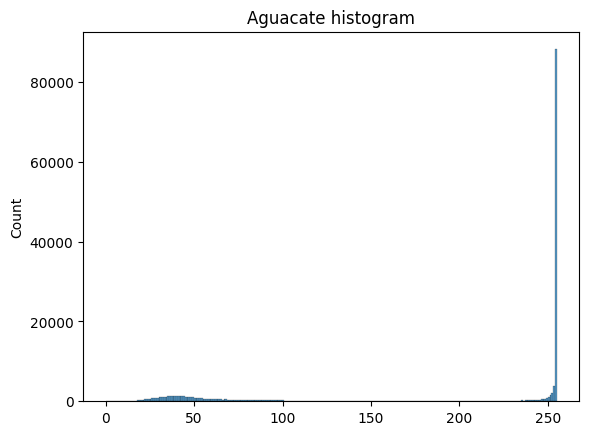

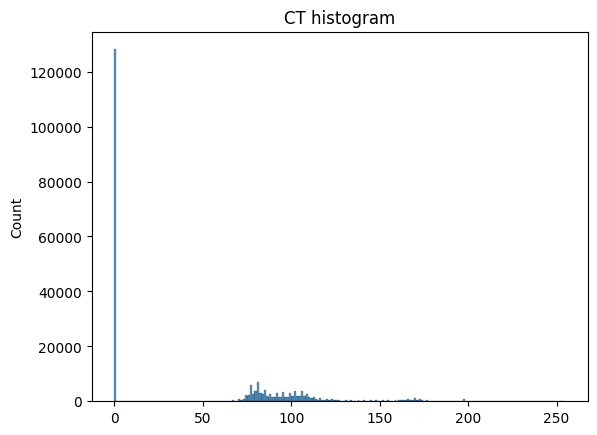

In [5]:
img1 = cv2.imread(input_path + 'aguacateBW.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(input_path + 'CT_1.png', cv2.IMREAD_GRAYSCALE)

# Regions can be splitted with a threshold ~= 150
sns.histplot(img1.ravel(), binrange=(0, 255), bins=256)
plt.title("Aguacate histogram")
plt.show()

# Regions can be splitted with a threshold ~= 40
sns.histplot(img2.ravel(), binrange=(0, 255), bins=256)
plt.title("CT histogram")
plt.show()

#### 3.2. Perform the segmentation of the object (whitest part of the image), by using the Otsu method.

Aguacate threshold =  153.0


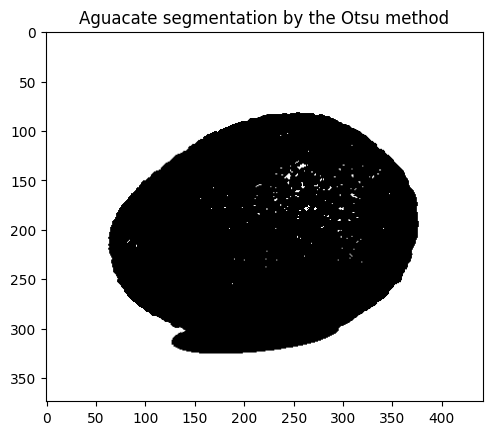

CT threshold =  51.0


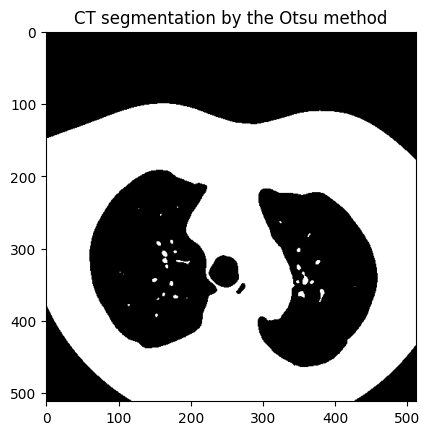

In [6]:
thresh, img1_thresh = cv2.threshold(img1, 0, 255, cv2.THRESH_OTSU)
print("Aguacate threshold = ", thresh)
plt.imshow(img1_thresh, cmap='gray')
plt.title("Aguacate segmentation by the Otsu method")
plt.show()

thresh, img2_thresh = cv2.threshold(img2, 0, 255, cv2.THRESH_OTSU)
print("CT threshold = ", thresh)
plt.imshow(img2_thresh, cmap='gray')
plt.title("CT segmentation by the Otsu method")
plt.show()

#### 3.3. Do the same as ii) by using implementing the Otsu method from the scratch, and compare the results obtained.

Aguacate threshold =  154


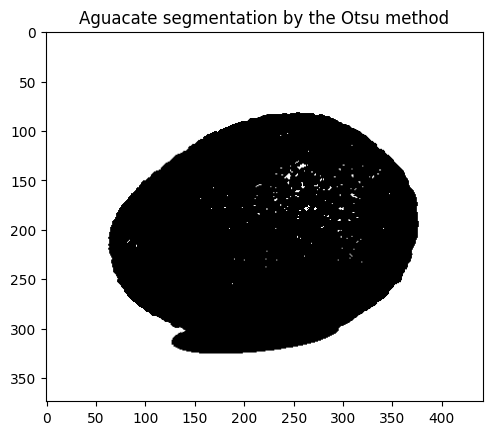

CT threshold =  52


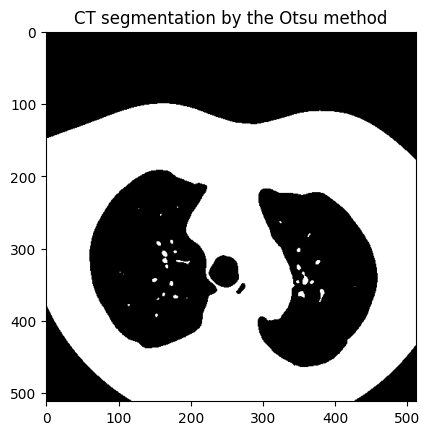

In [7]:
def otsu_threshold(img):
    
    # Compute the threshold
    intra_class_variance = np.zeros(256)
    n = img.size
    
    for t in range(0, 256):
        thresholded_indexes = img < t, img >= t  # change the = to get +1 as in OpenCV
        
        w0 = np.sum(thresholded_indexes[0]) / n
        w1 = np.sum(thresholded_indexes[1]) / n
        
        o20 = np.var(img[thresholded_indexes[0]]) if w0 > 0 else 0
        o21 = np.var(img[thresholded_indexes[1]]) if w1 > 0 else 0
        
        intra_class_variance[t] = w0 * o20 + w1 * o21
        #print(f"|| {intra_class_variance[t]} || t={t}, w0={w0}, w1={w1}, o20={o20}, o21={o21}")

    threshold = np.argmin(intra_class_variance)
    
    # Threshold the image
    img = img.copy()
    img[img < threshold] = 0
    img[img >= threshold] = 255
    
    return threshold, img, intra_class_variance

thresh, img1_thresh, _ = otsu_threshold(img1)
print("Aguacate threshold = ", thresh)
plt.imshow(img1_thresh, cmap='gray')
plt.title("Aguacate segmentation by the Otsu method")
plt.show()

thresh, img2_thresh, _ = otsu_threshold(img2)
print("CT threshold = ", thresh)
plt.imshow(img2_thresh, cmap='gray')
plt.title("CT segmentation by the Otsu method")
plt.show()

# Our implementation returns a threshold greater to the OpenCV function exactly by 1. 
# Checking the documentation (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) it can
# be seen that pixels with value t are included in the pixels for w2, instead of w1. 
# Following the opposite approach (like the notes from class), the results present this small difference.
# In fact, the implementation from scracth given in that same page, returns the exactly same output as ours.

#### 3.4. Represent in a figure (superimposed) the plots corresponding to the smoothed histogram and the inter-class variance.

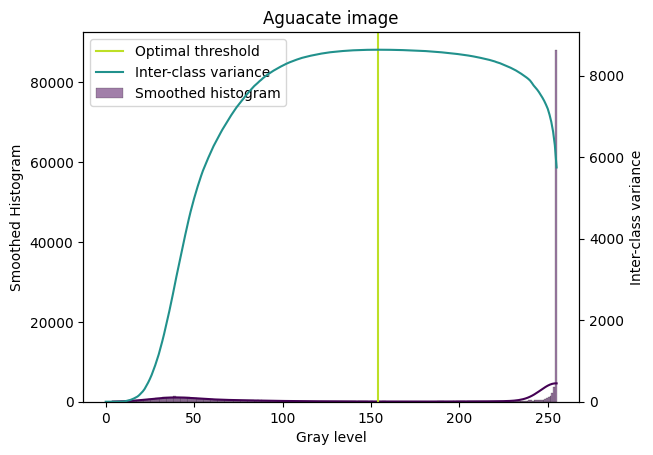

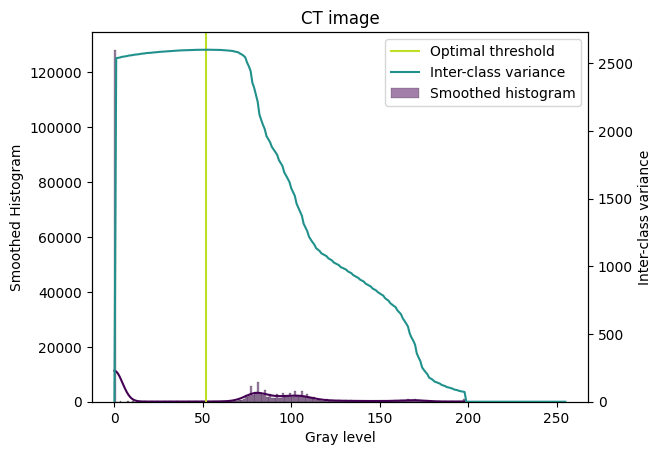

In [8]:
def plot_histogram_variance(img, title="", loc="upper left"): 
    _, host = plt.subplots()
    
    # Plot smoothed histogram
    sns.histplot(img.ravel(), kde=True, binrange=(0, 255), bins=256, legend=True, color=plt.cm.viridis(0), label="Smoothed histogram")

    # Calculate and plot the inter-class variance
    threshold, _, intra_variance = otsu_threshold(img)
    inter_variance = np.var(img) - intra_variance
    
    par1 = host.twinx()
    par1.plot(inter_variance, color=plt.cm.viridis(0.5), label="Inter-class variance")
    
    # Plot the otsu threshold value
    host.axvline(threshold, color=plt.cm.viridis(0.9), label='Optimal threshold')
    
    # Pretty the figure
    par1.set_ylabel("Inter-class variance")
    par1.set_ylim(bottom=0)
    
    host.set_xlabel("Gray level")
    host.set_ylabel("Smoothed Histogram")
    host.plot([], [], color=plt.cm.viridis(0.5), label='Inter-class variance')  # hack to show the 3 legends
    host.legend(loc=loc)
    
    plt.title(title)
    plt.show()

plot_histogram_variance(img1, title="Aguacate image", loc="upper left")
plot_histogram_variance(img2, title="CT image", loc="upper right")

#### 3.5. Save the resulting image for future use.

In [9]:
cv2.imwrite(output_path + "aguacateBW_otsu.png", img1_thresh)
cv2.imwrite(output_path + "CT_1_otsu.png", img2_thresh)

True

# 2. Morphological Transformations and Region Growing

#### 2.1. Given the image obtained in exercise 1.1, apply morphological transformation to eliminate the artifacts inside the lungs (see Fig. 1).

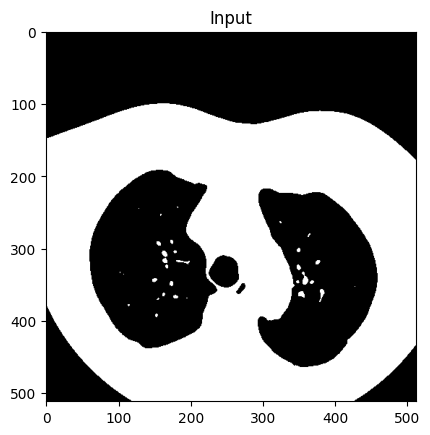

In [10]:
img_lungs = cv2.imread(output_path + 'CT_1_otsu.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_lungs, cmap='gray')
plt.title("Input")
plt.show()

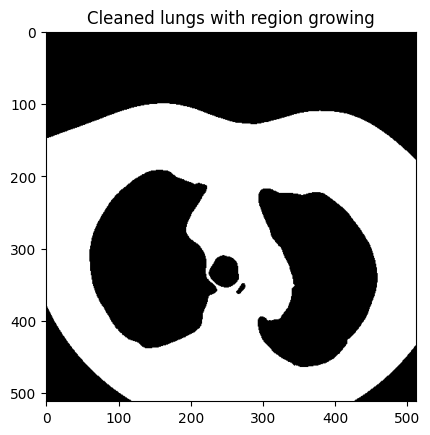

In [11]:
########################################### 
#    Approximation with region growing    #
########################################### 

def region_growing(img, seed, tolerance=0):
    img_int32 = img.astype(np.int32)
    
    value = img[seed[0], seed[1]]
    frontier = [seed]
    output = np.zeros_like(img)

    while len(frontier) > 0:
        x,y = frontier.pop()
        
        # Already visited pixel
        if output[x,y] > 0:
            continue
            
        # Pixel does not meet the condition
        if abs(value - img_int32[x,y]) > tolerance:
            continue
        
        output[x,y] = 255
            
        # Add the neighbours to the frontier (4-connectivity)
        if x > 0:                frontier.append((x-1,y))
        if x < img.shape[0] - 1: frontier.append((x+1,y))
        if y > 0:                frontier.append((x,y-1))
        if y < img.shape[1] - 1: frontier.append((x,y+1))
            
    return output

foreground = region_growing(img_lungs, (180, 250))  # seed in the 255 foreground

plt.imshow(foreground, 'gray')
plt.title("Cleaned lungs with region growing")
plt.show()

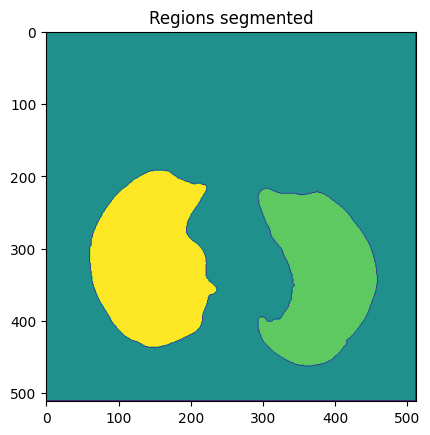

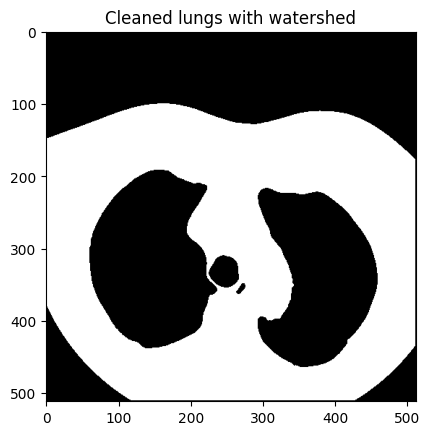

In [12]:
###################################### 
#    Approximation with waterhsed    #
###################################### 

# Set the initial seeds
seeds = np.zeros_like(img_lungs)
cv2.circle(seeds, (250, 200), 10, 1, -1)  # foreground
cv2.circle(seeds, (390, 340), 10, 2, -1)  # right lung
cv2.circle(seeds, (100, 325), 10, 3, -1)  # left lung

# Apply the watershed algorithm
img_lungs_rgb = cv2.imread(input_path + "CT_1.png", cv2.IMREAD_COLOR)
markers = cv2.watershed(img_lungs_rgb, seeds.astype(np.int32))
plt.imshow(markers)
plt.title("Regions segmented")
plt.show()

# Removed the filled regions corresponding to the lungs
img_lungs_cleaned = np.copy(img_lungs)
img_lungs_cleaned[markers == -1] = 0  # edges
img_lungs_cleaned[markers == 2] = 0 
img_lungs_cleaned[markers == 3] = 0 

plt.imshow(img_lungs_cleaned, cmap='gray')
plt.title("Cleaned lungs with watershed")
plt.show()

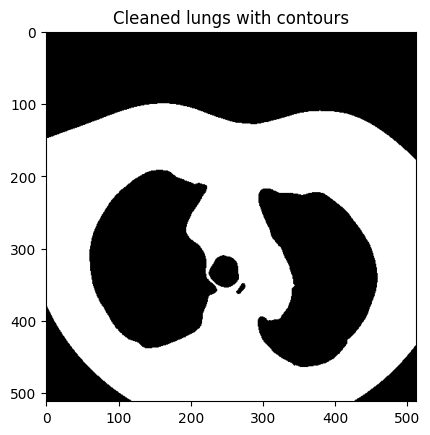

In [13]:
#####################################
#    Approximation with contours    #
##################################### 

# Find the contours on the negative image (artifacts are background and ignored, so we can detect the lungs properly)
negative_lungs = cv2.bitwise_not(img_lungs)
contours, _ = cv2.findContours(negative_lungs, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fill (thickness < 0) all the contours
img_lungs_cleaned = np.zeros_like(img_lungs)
cv2.drawContours(img_lungs_cleaned, contours, -1, 255, -1)

# Change the filled regions for the interested region
img_lungs_cleaned = cv2.bitwise_not(img_lungs_cleaned)

plt.imshow(img_lungs_cleaned, 'gray', vmin=0, vmax=255)
plt.title("Cleaned lungs with contours")
plt.show()

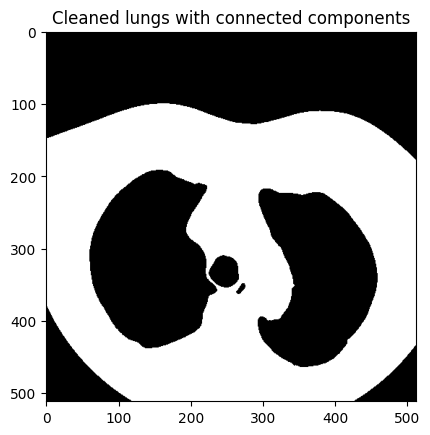

In [14]:
#################################################
#    Approximation with connected components    #
#################################################

# Compute the connected components
total_labels, labels, values, _ = cv2.connectedComponentsWithStats(img_lungs, 4)
areas = values[:, cv2.CC_STAT_AREA]

# Set as the foreground the one with the greater area (discarding the background)
fg_label = np.unique(labels[1:])[np.argmax(areas[1:])] + 1  # label 0 is for background
img_lungs_cleaned = (labels == fg_label) * 255

plt.imshow(img_lungs_cleaned, cmap='gray')
plt.title("Cleaned lungs with connected components")
plt.show()

#### 2.2. Save the resulting image.

In [15]:
cv2.imwrite(output_path + "CT_1_cleaned.png", img_lungs_cleaned)

True